In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import time;  from datetime import datetime

In [12]:
plt.rcParams["figure.figsize"] = (15,10)

In [155]:
nyc = pd.read_csv('gapi_city_data-export-2017-11-30.csv')
nyc.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN
nyc.drop("Organic Searches", axis=1,inplace=True) # Drops Column
nyc = nyc.loc[nyc['City'] == 1023191] # Selects records only NYC

In [157]:
weather = pd.read_csv('open_weather_6cities.csv')
weather.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN
weather = weather.loc[weather['city_id'] == 5128581] # Selects records only NYC

In [158]:
def unixtimestamp(row):
    return int(int(time.mktime(datetime.strptime(row, "%Y%m%d%H").timetuple())))

In [159]:
nyc['unix_time'] = nyc.apply(lambda row: unixtimestamp(str(row['Date Hour'])), axis=1)

In [160]:
df = nyc.join(weather.set_index('dt'), on='unix_time')

In [180]:
df[df['temp'].isnull()]

,City,Date Hour,User Type,Device Category,Sessions,Bounces,Users,Transactions,Transaction Revenue,Revenue Per User,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
5889,1023191,2017070203,New Visitor,mobile,5,1,5,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5890,1023191,2017070203,Returning Visitor,mobile,1,0,1,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5891,1023191,2017070204,New Visitor,desktop,1,1,1,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5892,1023191,2017070204,New Visitor,mobile,4,2,5,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5893,1023191,2017070204,Returning Visitor,mobile,2,0,2,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5894,1023191,2017070205,New Visitor,desktop,1,1,1,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5895,1023191,2017070205,New Visitor,mobile,5,4,6,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5896,1023191,2017070205,New Visitor,tablet,2,0,2,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5897,1023191,2017070205,Returning Visitor,mobile,2,2,2,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5898,1023191,2017070205,Returning Visitor,tablet,1,0,1,0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df[["User Type",'Sessions','Transactions', 'Revenue Per User','temp']]

,User Type,Sessions,Transactions,Revenue Per User,temp
5882,New Visitor,3,0,0.000000,295.070
5883,New Visitor,1,0,0.000000,295.070
5884,Returning Visitor,1,0,0.000000,295.070
5885,New Visitor,5,0,0.000000,294.840
5886,Returning Visitor,1,0,0.000000,294.840
5887,New Visitor,4,0,0.000000,294.920
5887,New Visitor,4,0,0.000000,294.920
5888,Returning Visitor,1,0,0.000000,294.920
5888,Returning Visitor,1,0,0.000000,294.920
5889,New Visitor,5,0,0.000000,NaN


In [173]:
df['weather_main'].isnull().sum()

13884

In [154]:
df.head()

,User Type,Sessions
5882,New Visitor,3
5883,New Visitor,1
5884,Returning Visitor,1
5885,New Visitor,5
5886,Returning Visitor,1


In [ ]:
df3['City_name'] = (df3['City']).map(find_city_name)

In [10]:
df = df[['dt','dt_iso','temp','weather_id','weather_main']]

In [11]:
df.loc[df['dt'] == 1498978800]

,dt,dt_iso,temp,weather_id,weather_main
44955,1498978800,2017-07-02 07:00:00 +0000 UTC,295.07,701,Mist


In [42]:
df.weather_main.unique()


array(['Clear', 'Clouds', 'Rain', 'Mist', 'Haze', 'Fog', 'Snow', 'Drizzle',
       'Thunderstorm', 'Squall', 'Smoke', 'Sand', 'Dust'], dtype=object)

In [44]:
df2 = df.pivot_table(columns='weather_main',values='dt', aggfunc='count')

In [53]:
df2.drop(['Dust',"Sand",'Smoke',"Squall"], axis=1,inplace = True)

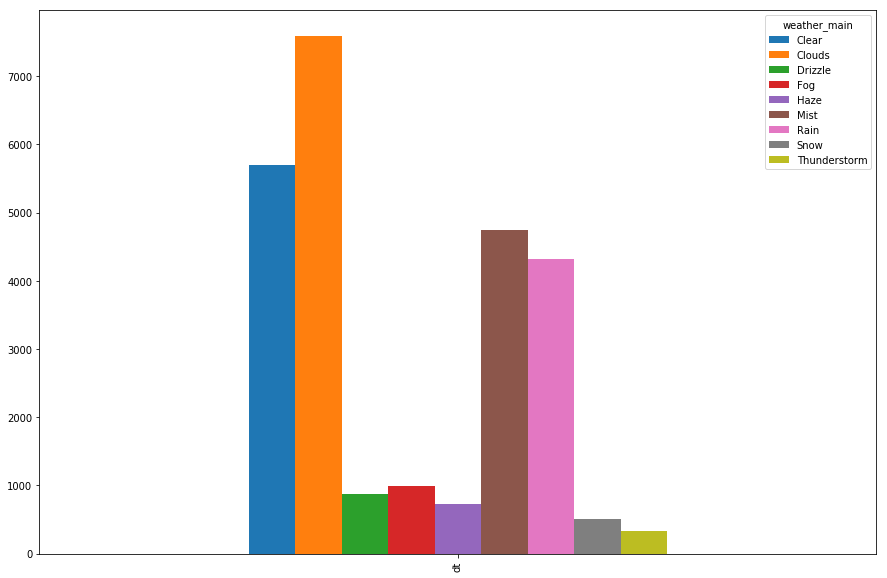

In [55]:
d = df2.plot.bar()

In [79]:
t = df['dt_iso'].iloc[25]

In [80]:
t

'2015-01-01 20:00:00 +0000 UTC'

In [101]:
f = time.strptime('2015-01-01 00:00:00 +0000 UTC', "%Y-%d-%m %H:%M:%S +0000 %Z")

In [100]:
f

time.struct_time(tm_year=2015, tm_mon=1, tm_mday=1, tm_hour=20, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

In [98]:
datetime.fromtimestamp(time.mktime(f))

datetime.datetime(2015, 1, 1, 20, 0)